In [1]:
import torch
import torch.nn as nn
import torch.nn.init
import torch.optim as optim

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)

Processing...
Done!


In [4]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)

In [5]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize=(5, 15))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

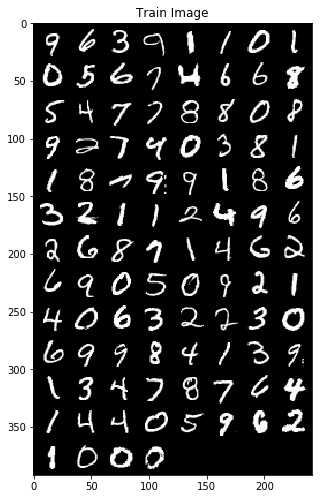

In [6]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

# Define Model

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(500, 250),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(250, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        out = self.discriminator(x)
        return out

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(100, 250),
            nn.LeakyReLU(0.2),
            nn.Linear(250, 500),
            nn.LeakyReLU(0.2),
            nn.Linear(500, 28 * 28),
            nn.Tanh()
        )
        
    def forward(self, z):
        out = self.generator(z)
        out = out.view(-1, 1, 28, 28)
        return out

In [10]:
D = Discriminator()
G = Generator()

# Train Model

In [11]:
def gan_loss(x, target_is_real):
    loss = nn.BCELoss()
    
    if target_is_real:
        target_tensor = torch.ones(batch_size, 1)
    else:
        target_tensor = torch.zeros(batch_size, 1)
        
    return loss(x, target_tensor)

In [12]:
G_optimizer = optim.Adam(G.parameters(), lr=0.0001)
D_optimizer = optim.Adam(D.parameters(), lr=0.0001)

In [13]:
num_epochs = 50

In [14]:
for epoch in range(num_epochs):
    total_batch = len(mnist_train) // batch_size
    
    for i, (images, labels) in enumerate(train_loader):
        prob_real = D(images)
        D_loss_real = gan_loss(prob_real, True)
        
        z = torch.randn((batch_size, 100))
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        D_loss_fake = gan_loss(prob_fake, False)
        
        D_loss = D_loss_real + D_loss_fake
        
        D.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        
        z = torch.randn((batch_size, 100))
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        G_loss = gan_loss(prob_fake, True)
        
        G.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], D_Loss: %.4f, G_Loss: %.4f' % (epoch + 1, num_epochs, i + 1, total_batch, D_loss.item(), G_loss.item()))

Epoch [1/50], Iter [100/600], D_Loss: 0.8802, G_Loss: 1.3315
Epoch [1/50], Iter [200/600], D_Loss: 0.4790, G_Loss: 2.3427
Epoch [1/50], Iter [300/600], D_Loss: 0.7030, G_Loss: 2.2419
Epoch [1/50], Iter [400/600], D_Loss: 1.2225, G_Loss: 1.1225
Epoch [1/50], Iter [500/600], D_Loss: 0.9965, G_Loss: 1.3051
Epoch [1/50], Iter [600/600], D_Loss: 1.0156, G_Loss: 1.2758
Epoch [2/50], Iter [100/600], D_Loss: 1.6373, G_Loss: 0.6896
Epoch [2/50], Iter [200/600], D_Loss: 1.4801, G_Loss: 0.7915
Epoch [2/50], Iter [300/600], D_Loss: 1.5649, G_Loss: 0.6607
Epoch [2/50], Iter [400/600], D_Loss: 1.3310, G_Loss: 0.7320
Epoch [2/50], Iter [500/600], D_Loss: 1.0350, G_Loss: 0.9385
Epoch [2/50], Iter [600/600], D_Loss: 0.8635, G_Loss: 0.9172
Epoch [3/50], Iter [100/600], D_Loss: 0.7107, G_Loss: 1.2593
Epoch [3/50], Iter [200/600], D_Loss: 0.6435, G_Loss: 1.5270
Epoch [3/50], Iter [300/600], D_Loss: 0.6070, G_Loss: 3.4913
Epoch [3/50], Iter [400/600], D_Loss: 0.4729, G_Loss: 2.6705
Epoch [3/50], Iter [500/

Epoch [23/50], Iter [300/600], D_Loss: 0.4540, G_Loss: 2.5760
Epoch [23/50], Iter [400/600], D_Loss: 0.5151, G_Loss: 2.7356
Epoch [23/50], Iter [500/600], D_Loss: 0.5784, G_Loss: 2.3191
Epoch [23/50], Iter [600/600], D_Loss: 0.6182, G_Loss: 3.1740
Epoch [24/50], Iter [100/600], D_Loss: 0.5583, G_Loss: 2.5582
Epoch [24/50], Iter [200/600], D_Loss: 0.6795, G_Loss: 2.5599
Epoch [24/50], Iter [300/600], D_Loss: 0.6793, G_Loss: 2.4476
Epoch [24/50], Iter [400/600], D_Loss: 0.6249, G_Loss: 3.0803
Epoch [24/50], Iter [500/600], D_Loss: 0.7137, G_Loss: 2.6578
Epoch [24/50], Iter [600/600], D_Loss: 0.4336, G_Loss: 3.0392
Epoch [25/50], Iter [100/600], D_Loss: 0.7863, G_Loss: 2.6461
Epoch [25/50], Iter [200/600], D_Loss: 0.5425, G_Loss: 2.2616
Epoch [25/50], Iter [300/600], D_Loss: 0.4690, G_Loss: 2.3195
Epoch [25/50], Iter [400/600], D_Loss: 0.6282, G_Loss: 2.4980
Epoch [25/50], Iter [500/600], D_Loss: 0.6079, G_Loss: 2.8083
Epoch [25/50], Iter [600/600], D_Loss: 0.5229, G_Loss: 2.5242
Epoch [2

Epoch [45/50], Iter [400/600], D_Loss: 0.6566, G_Loss: 2.4840
Epoch [45/50], Iter [500/600], D_Loss: 0.6985, G_Loss: 2.8151
Epoch [45/50], Iter [600/600], D_Loss: 0.5708, G_Loss: 2.8991
Epoch [46/50], Iter [100/600], D_Loss: 0.5206, G_Loss: 2.8327
Epoch [46/50], Iter [200/600], D_Loss: 0.5129, G_Loss: 2.6171
Epoch [46/50], Iter [300/600], D_Loss: 0.4859, G_Loss: 2.4545
Epoch [46/50], Iter [400/600], D_Loss: 0.5279, G_Loss: 2.5769
Epoch [46/50], Iter [500/600], D_Loss: 0.4940, G_Loss: 2.2199
Epoch [46/50], Iter [600/600], D_Loss: 0.5626, G_Loss: 2.7796
Epoch [47/50], Iter [100/600], D_Loss: 0.4569, G_Loss: 2.6700
Epoch [47/50], Iter [200/600], D_Loss: 0.4048, G_Loss: 2.4930
Epoch [47/50], Iter [300/600], D_Loss: 0.6461, G_Loss: 2.3119
Epoch [47/50], Iter [400/600], D_Loss: 0.5651, G_Loss: 2.7159
Epoch [47/50], Iter [500/600], D_Loss: 0.5832, G_Loss: 2.6935
Epoch [47/50], Iter [600/600], D_Loss: 0.5846, G_Loss: 2.6284
Epoch [48/50], Iter [100/600], D_Loss: 0.5934, G_Loss: 2.5402
Epoch [4

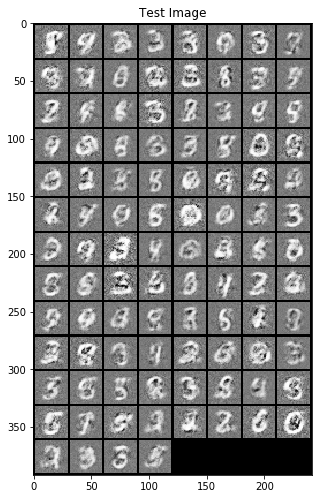

In [15]:
G.eval()

z = torch.randn((batch_size, 100))
images = G(z)
imshow(torchvision.utils.make_grid(images.data.cpu(), normalize=True), "Test Image")